In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.5 MB/s eta 0:01:09
   ---------------------------------------- 0.3/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.4/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.5/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.7/99.8 MB 2.8 MB/s eta 0:00:35
   ---------------------------------------- 0.9/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.0/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.2/99.8 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.3/99.8 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.5/99.8 MB 3.0 MB/s eta 0:00:33
    --------

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
  
pd.set_option('display.max_rows', 15)
np.random.seed(5)

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
batter=pd.read_csv('batter_for_clustering.csv')

In [4]:
batter

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank
0,V Kohli,RCB,38.66,131.97,0.161,4.004,0.152,14.557,0.291,51.020,Best
1,S Dhawan,DC/DCH/MI/PBKS/SRH,35.25,127.14,0.173,4.163,0.131,12.602,0.249,44.817,Good
2,RG Sharma,DCH/MI,29.72,131.14,0.174,3.488,0.115,10.127,0.187,38.975,Average
3,DA Warner,DC/SRH,40.52,139.77,0.191,4.886,0.120,13.571,0.380,56.635,Best
4,SK Raina,CSK/GL,32.51,136.73,0.175,3.545,0.150,11.430,0.205,44.451,Good
...,...,...,...,...,...,...,...,...,...,...,...
123,Gurkeerat Singh,KXIP/RCB,21.29,121.09,0.156,2.062,0.250,7.031,0.062,25.780,Poor
124,OA Shah,KKR/Kochi/RR,33.73,130.07,0.147,2.591,0.318,10.545,0.182,43.873,Good
125,PC Valthaty,KXIP/RR,22.95,120.81,0.191,3.478,0.043,6.304,0.174,27.726,Poor
126,SW Billings,CSK/DC/KKR,19.34,129.63,0.155,2.222,0.037,8.259,0.111,25.070,Poor


In [5]:
batter_for_clustering = batter.copy().drop(['name','team','prelim_metric','pre-rank'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,38.66,131.97,0.161,4.004,0.152,14.557,0.291
1,35.25,127.14,0.173,4.163,0.131,12.602,0.249
2,29.72,131.14,0.174,3.488,0.115,10.127,0.187
3,40.52,139.77,0.191,4.886,0.120,13.571,0.380
4,32.51,136.73,0.175,3.545,0.150,11.430,0.205
...,...,...,...,...,...,...,...
123,21.29,121.09,0.156,2.062,0.250,7.031,0.062
124,33.73,130.07,0.147,2.591,0.318,10.545,0.182
125,22.95,120.81,0.191,3.478,0.043,6.304,0.174
126,19.34,129.63,0.155,2.222,0.037,8.259,0.111


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_for_clustering_scaled= scaler.fit_transform(batter_for_clustering)

In [7]:
columns = batter_for_clustering.columns.tolist()

In [8]:
batter_for_clustering_scaled = pd.DataFrame(batter_for_clustering_scaled,columns = columns)
batter_for_clustering_scaled

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,1.431134,-0.206484,-0.526761,0.835428,-0.219344,1.899979,1.443680
1,0.963072,-0.564626,-0.150433,0.983592,-0.408681,1.225365,1.020587
2,0.204016,-0.268028,-0.119072,0.354596,-0.552938,0.371315,0.396020
3,1.686440,0.371884,0.414059,1.657316,-0.507858,1.559739,2.340235
4,0.586975,0.146469,-0.087712,0.407711,-0.237376,0.820942,0.577346
...,...,...,...,...,...,...,...
123,-0.953099,-1.013232,-0.683564,-0.974215,0.664230,-0.697024,-0.863186
124,0.754434,-0.347368,-0.965810,-0.481269,1.277322,0.515555,0.345652
125,-0.725245,-1.033994,0.414059,0.345278,-1.202094,-0.947891,0.265063
126,-1.220759,-0.379994,-0.714925,-0.825120,-1.256191,-0.273277,-0.369577


In [10]:
batter_scaled = batter_for_clustering_scaled.copy()
batter_scaled['name'] = batter['name']
batter_scaled['team'] = batter['team']

cols = batter_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


batter_scaled = batter_scaled [cols]
batter_scaled

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,V Kohli,RCB,1.431134,-0.206484,-0.526761,0.835428,-0.219344,1.899979,1.443680
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963072,-0.564626,-0.150433,0.983592,-0.408681,1.225365,1.020587
2,RG Sharma,DCH/MI,0.204016,-0.268028,-0.119072,0.354596,-0.552938,0.371315,0.396020
3,DA Warner,DC/SRH,1.686440,0.371884,0.414059,1.657316,-0.507858,1.559739,2.340235
4,SK Raina,CSK/GL,0.586975,0.146469,-0.087712,0.407711,-0.237376,0.820942,0.577346
...,...,...,...,...,...,...,...,...,...
123,Gurkeerat Singh,KXIP/RCB,-0.953099,-1.013232,-0.683564,-0.974215,0.664230,-0.697024,-0.863186
124,OA Shah,KKR/Kochi/RR,0.754434,-0.347368,-0.965810,-0.481269,1.277322,0.515555,0.345652
125,PC Valthaty,KXIP/RR,-0.725245,-1.033994,0.414059,0.345278,-1.202094,-0.947891,0.265063
126,SW Billings,CSK/DC/KKR,-1.220759,-0.379994,-0.714925,-0.825120,-1.256191,-0.273277,-0.369577


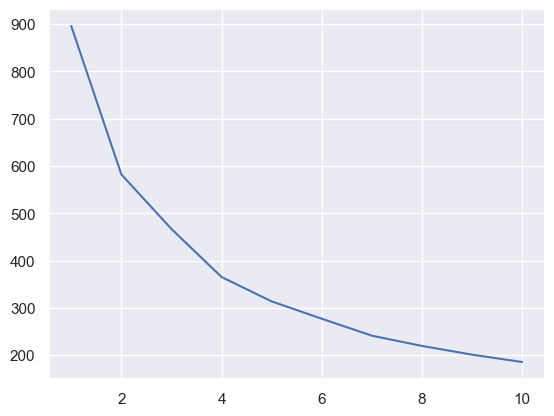

In [11]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering_scaled)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [13]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_for_clustering_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_for_clustering_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3036718471696893
For n_clusters = 3 The average silhouette_score is : 0.25321013717315827
For n_clusters = 4 The average silhouette_score is : 0.26768566937973093
For n_clusters = 5 The average silhouette_score is : 0.26057077131481166
For n_clusters = 6 The average silhouette_score is : 0.2636586449764059
For n_clusters = 7 The average silhouette_score is : 0.273572701275522
For n_clusters = 8 The average silhouette_score is : 0.27082163587054875
For n_clusters = 9 The average silhouette_score is : 0.26958843538071664
For n_clusters = 10 The average silhouette_score is : 0.2598473374835165


In [14]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(batter_for_clustering_scaled)

In [15]:
ypred_kmeans

array([0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 0, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 0, 3, 0, 1, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 1, 3, 2, 1, 2, 2, 3, 0, 2, 3, 1, 1, 2, 2, 1, 3, 1,
       0, 1, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 3, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 1, 2, 3, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 3, 2,
       2, 3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3])

In [16]:
print('Silhouette score :',np.round(silhouette_score(batter_for_clustering_scaled, ypred_kmeans, metric='euclidean'),3))
print('Calinski-Harabasz Index :',np.round(metrics.calinski_harabasz_score(batter_for_clustering_scaled, ypred_kmeans),3))
print('Davies-Bouldin Index  :',np.round(metrics.davies_bouldin_score(batter_for_clustering_scaled, ypred_kmeans),3))

Silhouette score : 0.269
Calinski-Harabasz Index : 60.543
Davies-Bouldin Index  : 1.137


In [17]:
results = batter_scaled
results['kmeans'] = ypred_kmeans

In [18]:
results

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,V Kohli,RCB,1.431134,-0.206484,-0.526761,0.835428,-0.219344,1.899979,1.443680,0
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963072,-0.564626,-0.150433,0.983592,-0.408681,1.225365,1.020587,0
2,RG Sharma,DCH/MI,0.204016,-0.268028,-0.119072,0.354596,-0.552938,0.371315,0.396020,1
3,DA Warner,DC/SRH,1.686440,0.371884,0.414059,1.657316,-0.507858,1.559739,2.340235,0
4,SK Raina,CSK/GL,0.586975,0.146469,-0.087712,0.407711,-0.237376,0.820942,0.577346,1
...,...,...,...,...,...,...,...,...,...,...
123,Gurkeerat Singh,KXIP/RCB,-0.953099,-1.013232,-0.683564,-0.974215,0.664230,-0.697024,-0.863186,2
124,OA Shah,KKR/Kochi/RR,0.754434,-0.347368,-0.965810,-0.481269,1.277322,0.515555,0.345652,1
125,PC Valthaty,KXIP/RR,-0.725245,-1.033994,0.414059,0.345278,-1.202094,-0.947891,0.265063,1
126,SW Billings,CSK/DC/KKR,-1.220759,-0.379994,-0.714925,-0.825120,-1.256191,-0.273277,-0.369577,1


In [19]:
results['kmeans'].value_counts()

kmeans
1    48
2    37
0    22
3    21
Name: count, dtype: int64

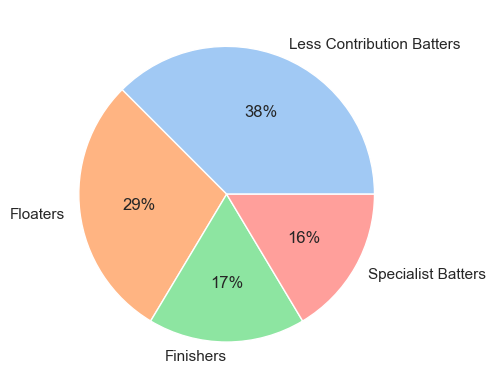

In [20]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Less Contribution Batters','Floaters','Finishers','Specialist Batters'])
plt.show()

In [21]:
np.round(kmodel.cluster_centers_,3)


array([[ 1.5  ,  0.367,  0.351,  1.44 , -0.518,  1.358,  1.625],
       [-0.052, -0.519, -0.398, -0.02 , -0.382,  0.28 , -0.007],
       [-0.819, -0.229, -0.565, -1.144,  1.106, -0.825, -1.012],
       [-0.009,  1.205,  1.537,  0.552, -0.533, -0.608,  0.095]])

In [22]:
columns = batter_for_clustering_scaled.columns
columns

Index(['average', 'strike_rate', 'boundary_per_ball', 'boundary_index',
       'finishing_index', 'runs_without_boundary_index', 'big_match_index'],
      dtype='object')

In [23]:
cluster_center = pd.DataFrame(data=np.round(kmodel.cluster_centers_,3) , columns = columns, index=('Floaters','Less Contribution Batters','Finishers','Specialist Batters'))
cluster_center['No. of Batters'] = [22,48,37,21]

cols = cluster_center.columns.tolist()
cols = cols[-1:] + cols[:-1]


cluster_center = cluster_center [cols]
cluster_center

,No. of Batters,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
Floaters,22,1.500,0.367,0.351,1.440,-0.518,1.358,1.625
Less Contribution Batters,48,-0.052,-0.519,-0.398,-0.020,-0.382,0.280,-0.007
Finishers,37,-0.819,-0.229,-0.565,-1.144,1.106,-0.825,-1.012
Specialist Batters,21,-0.009,1.205,1.537,0.552,-0.533,-0.608,0.095


In [24]:
results[(results['kmeans'] == 3)].head(7)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
15,SR Watson,CSK/RCB/RR,0.378338,0.233965,0.727665,0.838224,-0.570970,-0.103157,0.587420,3
17,SA Yadav,KKR/MI,0.527953,0.783414,0.947190,0.659310,-0.057055,0.133216,0.597493,3
28,V Sehwag,DC/KXIP,-0.093842,1.533809,2.295697,1.046957,-1.157014,-0.614897,0.446389,3
35,AD Russell,DC/KKR,0.135385,2.978244,2.797468,0.468281,0.123266,-1.315736,-0.430019,3
37,DR Smith,CSK/DCH/GL/MI,0.021458,0.033020,0.853108,0.894135,-1.084886,-0.397503,0.436315,3
44,AC Gilchrist,DCH/KXIP,-0.139138,0.269557,1.354878,0.960296,-1.138982,-0.703580,0.406094,3
47,PP Shaw,DC,-0.589356,0.942095,1.731206,0.631354,-1.589785,-0.615932,0.295284,3


In [25]:
results[(results['kmeans'] == 2)].head(10)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
5,MS Dhoni,CSK/RPS,1.494274,0.205788,-0.526761,-0.392744,2.151880,0.310928,-0.430019,2
19,KA Pollard,MI,0.059891,0.931714,0.382698,-0.492451,1.151097,-0.697714,-0.540829,2
21,YK Pathan,KKR/RR/SRH,0.121659,0.609163,0.288616,-0.354538,0.988808,-0.416482,-0.510608,2
33,HH Pandya,GT/MI,0.062636,0.804918,0.288616,-0.529725,1.223226,-0.554165,-0.702008,2
51,Mandeep Singh,DC/KKR/KXIP/PBKS/RCB,-1.020357,-0.878280,-0.746285,-0.860530,-0.120167,-0.397848,-0.873260,2
53,AR Patel,DC/KXIP,-0.929764,-0.288048,-0.965810,-1.361863,1.286338,-0.829876,-1.215764,2
54,KH Pandya,LSG/MI,-0.778777,-0.143456,-0.401318,-1.174562,1.493708,-0.931672,-1.397090,2
57,NV Ojha,DC/RR/SRH,-1.031338,-1.216402,-0.809007,-0.912713,0.231459,-0.935468,-0.843039,2
61,DJ Hooda,KXIP/LSG/PBKS/RR/SRH,-1.362138,-0.387409,-1.216695,-1.372113,-0.084103,-0.553130,-0.651639,2
62,EJG Morgan,KKR/KXIP/RCB/SRH,-0.765051,-0.901266,-0.746285,-0.708639,-0.030007,-0.486876,-0.812818,2


In [26]:
results[(results['kmeans'] == 0)].head(10)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,V Kohli,RCB,1.431134,-0.206484,-0.526761,0.835428,-0.219344,1.899979,1.443680,0
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963072,-0.564626,-0.150433,0.983592,-0.408681,1.225365,1.020587,0
3,DA Warner,DC/SRH,1.686440,0.371884,0.414059,1.657316,-0.507858,1.559739,2.340235,0
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.576631,1.053319,1.574403,2.133489,-0.570970,-0.169411,1.584711,0
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.364512,-0.011470,-0.275876,1.551086,-0.120167,2.378247,2.199204,0
11,F du Plessis,CSK/RCB/RPS,1.064645,0.119033,-0.087712,1.068390,-0.868500,1.605288,1.211986,0
18,JC Buttler,MI/RR,1.354267,0.946544,1.103993,1.640543,-0.570970,0.770217,1.645153,0
20,Shubman Gill,GT/KKR,1.317206,0.069353,-0.213154,0.878293,-0.237376,1.728478,1.332870,0
22,Q de Kock,DC/LSG/MI/RCB/SRH,0.414026,-0.039647,0.288616,0.927681,-1.084886,0.601477,1.050808,0
36,SE Marsh,KXIP,1.608201,-0.149388,0.194534,1.750501,-0.679163,1.602873,1.725742,0


In [27]:
results[(results['kmeans'] == 1)].head(15)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
2,RG Sharma,DCH/MI,0.204016,-0.268028,-0.119072,0.354596,-0.552938,0.371315,0.396020,1
4,SK Raina,CSK/GL,0.586975,0.146469,-0.087712,0.407711,-0.237376,0.820942,0.577346,1
7,RV Uthappa,CSK/KKR/MI/PWI/RCB/RR,-0.099332,-0.326606,-0.087712,0.239979,-0.814404,0.267794,-0.107662,1
8,KD Karthik,DC/GL/KKR/KXIP/MI/RCB,-0.264046,0.044884,-0.087712,-0.399267,0.339652,-0.156298,-0.540829,1
10,AM Rahane,CSK/DC/KKR/MI/RPS/RR,0.261665,-0.840463,-0.746285,0.270730,-0.697195,1.138752,0.516904,1
12,SV Samson,DC/RR,0.335787,0.311822,-0.087712,0.294026,-0.534906,0.634604,0.426241,1
13,AT Rayudu,CSK/MI,-0.000504,-0.534967,-0.683564,-0.244580,-0.002958,0.334738,-0.198325,1
14,G Gambhir,DC/KKR,0.379710,-0.806354,-0.495400,0.482259,-0.643099,1.178781,0.899703,1
16,MK Pandey,DC/KKR/LSG/MI/PWI/RCB/SRH,0.127149,-1.012490,-1.185335,-0.287445,-0.057055,0.891682,0.033369,1
23,SS Iyer,DC/KKR,0.548542,-0.540157,-0.652203,0.215751,-0.174264,0.972773,0.355726,1


In [29]:
results = np.round(results,3)

In [43]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  print('Confusion Matrix:',confusion_matrix)
  

In [31]:
#RFC

In [32]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)
X_test.drop(['name','team'],axis=1,inplace=True)

In [33]:
X_train

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
22,0.414,-0.040,0.289,0.928,-1.085,0.601,1.051
44,-0.139,0.270,1.355,0.960,-1.139,-0.704,0.406
65,-0.382,-2.073,-1.123,0.082,-1.103,0.260,-0.229
95,-0.993,-1.563,-0.401,-0.124,-1.355,-0.575,-0.450
30,0.027,0.082,0.445,0.625,-1.040,0.049,0.144
...,...,...,...,...,...,...,...
106,-1.192,-0.528,-0.401,-0.670,-1.085,-0.775,-0.652
14,0.380,-0.806,-0.495,0.482,-0.643,1.179,0.900
92,-1.719,0.234,0.696,-1.643,2.116,-2.107,-1.377
51,-1.020,-0.878,-0.746,-0.861,-0.120,-0.398,-0.873


In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)

In [35]:
fi_ovr = np.round(rfc.feature_importances_.tolist(),3)

In [36]:
dict_ovr = dict(zip(columns,np.array(fi_ovr)))
dict_ovr

{'average': 0.107,
 'strike_rate': 0.092,
 'boundary_per_ball': 0.137,
 'boundary_index': 0.251,
 'finishing_index': 0.114,
 'runs_without_boundary_index': 0.124,
 'big_match_index': 0.176}

In [44]:
get_accuracy_metrics(ypred_rfc,y_test)

The balanced accuracy on test data is 0.92262
F1 score micro : 0.89744
F1 score macro : 0.89653
F1 score weighted : 0.89838
Recall score : 0.9226190476190477
Precision score : 0.8879464285714286
Confusion Matrix: [[ 9  0  0  0]
 [ 1 15  2  0]
 [ 0  0  5  0]
 [ 0  1  0  6]]


In [45]:
final_index = results.copy()

In [46]:
final_index['rfc_score'] = 0
for i in columns:
    final_index['rfc_score'] = np.round(final_index['rfc_score'] + (final_index[i] * dict_ovr.get(i)),3)

In [47]:
final_index.sort_values('rfc_score',ascending = False).head(10)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,0,1.784
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,0,1.537
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,0,1.386
97,TM Head,RCB/SRH,1.170,2.900,2.609,1.428,-0.147,0.024,1.333,3,1.328
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,0,1.271
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,1.234
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,0,1.227
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,0,1.210
38,RD Gaikwad,CSK,1.855,0.156,-0.025,1.519,-0.481,2.005,1.917,0,1.121
18,JC Buttler,MI/RR,1.354,0.947,1.104,1.641,-0.571,0.770,1.645,0,1.115


In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

In [49]:
get_accuracy_metrics(ypred_knn,y_test)

The balanced accuracy on test data is 0.92262
F1 score micro : 0.92308
F1 score macro : 0.91767
F1 score weighted : 0.92473
Recall score : 0.9226190476190476
Precision score : 0.9142857142857143
Confusion Matrix: [[ 8  0  0  1]
 [ 1 17  0  0]
 [ 0  0  5  0]
 [ 1  0  0  6]]


In [50]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)

In [51]:
get_accuracy_metrics(ypred_xgb,y_test)

The balanced accuracy on test data is 0.8373
F1 score micro : 0.84615
F1 score macro : 0.82669
F1 score weighted : 0.8408
Recall score : 0.8373015873015872
Precision score : 0.8305555555555555
Confusion Matrix: [[ 8  0  0  1]
 [ 1 16  1  0]
 [ 0  0  5  0]
 [ 1  2  0  4]]


In [52]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.147,
 'strike_rate': 0.046,
 'boundary_per_ball': 0.177,
 'boundary_index': 0.178,
 'finishing_index': 0.035,
 'runs_without_boundary_index': 0.152,
 'big_match_index': 0.264}

In [53]:
final_index['xgb_score'] = 0
for i in columns:
  final_index['xgb_score'] = np.round(final_index['xgb_score'] + (final_index[i] * dict_xgb.get(i)),3)

In [54]:
final_index.sort_values('xgb_score',ascending = False).head(10).drop(['rfc_score'],axis=1)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,xgb_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,0,2.035
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,0,1.785
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,0,1.619
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,0,1.557
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,0,1.512
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,1.470
97,TM Head,RCB/SRH,1.170,2.900,2.609,1.428,-0.147,0.024,1.333,3,1.372
38,RD Gaikwad,CSK,1.855,0.156,-0.025,1.519,-0.481,2.005,1.917,0,1.340
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,0,1.311
94,RM Patidar,RCB,0.892,1.786,0.979,1.181,-1.211,0.773,2.290,0,1.276


In [55]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [56]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [57]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))])

In [58]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.8717948717948718
DecisionTreeClassifier 0.7948717948717948
XGBClassifier 0.8461538461538461
VotingClassifier 0.8717948717948718


In [59]:
ypred_voting = voting.predict(X_test)

In [60]:
get_accuracy_metrics(ypred_voting,y_test)

The balanced accuracy on test data is 0.87302
F1 score micro : 0.87179
F1 score macro : 0.85868
F1 score weighted : 0.87093
Recall score : 0.873015873015873
Precision score : 0.8519607843137256
Confusion Matrix: [[ 8  0  0  1]
 [ 1 16  1  0]
 [ 0  0  5  0]
 [ 1  1  0  5]]


In [61]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [62]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.094,
 'strike_rate': 0.062,
 'boundary_per_ball': 0.178,
 'boundary_index': 0.353,
 'finishing_index': 0.057,
 'runs_without_boundary_index': 0.098,
 'big_match_index': 0.159}

In [63]:
final_index['voting_score'] = 0
for i in columns:
  final_index['voting_score'] = np.round(final_index['voting_score'] + (final_index[i] * dict_voting.get(i)),3)

In [64]:
final_index.sort_values('voting_score',ascending = False).head(10).drop(['rfc_score','xgb_score'],axis=1)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,voting_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,0,1.933
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,0,1.612
97,TM Head,RCB/SRH,1.170,2.900,2.609,1.428,-0.147,0.024,1.333,3,1.464
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,0,1.448
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,0,1.428
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,0,1.401
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,1.336
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,0,1.296
18,JC Buttler,MI/RR,1.354,0.947,1.104,1.641,-0.571,0.770,1.645,0,1.266
55,YBK Jaiswal,RR,0.536,1.175,2.139,1.799,-1.247,-0.263,1.031,3,1.206


In [65]:
#ONE AGAINST ALL

In [67]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [69]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.156,
 'strike_rate': 0.025,
 'boundary_per_ball': 0.045,
 'boundary_index': 0.22,
 'finishing_index': 0.05,
 'runs_without_boundary_index': 0.174,
 'big_match_index': 0.331}

In [70]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,V Kohli,RCB,1.431,-0.206,-0.527,0.835,-0.219,1.900,1.444,1
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963,-0.565,-0.150,0.984,-0.409,1.225,1.021,1
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,1
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,1
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,1
...,...,...,...,...,...,...,...,...,...,...
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,1
81,H Klaasen,RCB/RR/SRH,1.367,2.487,0.790,0.599,0.105,1.028,1.031,1
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,1
94,RM Patidar,RCB,0.892,1.786,0.979,1.181,-1.211,0.773,2.290,1


In [71]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_0.get(i)),3)

In [72]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,2.300
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,2.011
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,1.926
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,1.878
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,1.834
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,1.677
38,RD Gaikwad,CSK,1.855,0.156,-0.025,1.519,-0.481,2.005,1.917,1.586
36,SE Marsh,KXIP,1.608,-0.149,0.195,1.751,-0.679,1.603,1.726,1.457
94,RM Patidar,RCB,0.892,1.786,0.979,1.181,-1.211,0.773,2.290,1.320
18,JC Buttler,MI/RR,1.354,0.947,1.104,1.641,-0.571,0.770,1.645,1.295


In [73]:
middle_ovr = results_new[results_new.kmeans == 1].copy()

In [75]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [76]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.106,
 'strike_rate': 0.145,
 'boundary_per_ball': 0.117,
 'boundary_index': 0.253,
 'finishing_index': 0.084,
 'runs_without_boundary_index': 0.159,
 'big_match_index': 0.136}

In [77]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
2,RG Sharma,DCH/MI,0.204,-0.268,-0.119,0.355,-0.553,0.371,0.396,1
4,SK Raina,CSK/GL,0.587,0.146,-0.088,0.408,-0.237,0.821,0.577,1
7,RV Uthappa,CSK/KKR/MI/PWI/RCB/RR,-0.099,-0.327,-0.088,0.240,-0.814,0.268,-0.108,1
8,KD Karthik,DC/GL/KKR/KXIP/MI/RCB,-0.264,0.045,-0.088,-0.399,0.340,-0.156,-0.541,1
10,AM Rahane,CSK/DC/KKR/MI/RPS/RR,0.262,-0.840,-0.746,0.271,-0.697,1.139,0.517,1
...,...,...,...,...,...,...,...,...,...,...
112,JD Ryder,PWI/RCB,-0.915,-0.214,0.445,-0.068,-1.283,-0.577,-0.098,1
118,RS Bopara,KXIP/SRH,0.174,-1.301,-1.781,-0.566,0.051,1.253,-0.118,1
124,OA Shah,KKR/Kochi/RR,0.754,-0.347,-0.966,-0.481,1.277,0.516,0.346,1
125,PC Valthaty,KXIP/RR,-0.725,-1.034,0.414,0.345,-1.202,-0.948,0.265,1


In [78]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_1.get(i)),3)

In [79]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
67,VR Iyer,KKR,0.458,0.175,0.320,0.565,-0.300,0.229,1.182,0.426
39,SR Tendulkar,MI,0.905,-1.108,-0.370,0.975,-0.319,1.212,0.446,0.366
4,SK Raina,CSK/GL,0.587,0.146,-0.088,0.408,-0.237,0.821,0.577,0.365
42,KS Williamson,GT/SRH,0.992,-0.678,-0.966,0.118,0.403,1.376,0.869,0.295
12,SV Samson,DC/RR,0.336,0.312,-0.088,0.294,-0.535,0.635,0.426,0.259
14,G Gambhir,DC/KKR,0.380,-0.806,-0.495,0.482,-0.643,1.179,0.900,0.242
45,JP Duminy,DC/DCH/MI,1.585,-0.796,-1.656,-0.415,1.458,1.587,0.346,0.175
30,Ishan Kishan,GL/MI,0.027,0.082,0.445,0.625,-1.040,0.049,0.144,0.166
59,S Dube,CSK/RCB/RR,0.248,0.884,0.163,-0.039,0.033,-0.001,0.003,0.166
34,SPD Smith,DC/PWI/RPS/RR,0.861,-0.494,-0.966,-0.040,0.448,1.422,-0.077,0.150


In [81]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]], ignore_index=True)

In [83]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [84]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.093,
 'strike_rate': 0.021,
 'boundary_per_ball': 0.036,
 'boundary_index': 0.389,
 'finishing_index': 0.17,
 'runs_without_boundary_index': 0.06,
 'big_match_index': 0.231}

In [85]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
5,MS Dhoni,CSK/RPS,1.494,0.206,-0.527,-0.393,2.152,0.311,-0.430,1
19,KA Pollard,MI,0.060,0.932,0.383,-0.492,1.151,-0.698,-0.541,1
21,YK Pathan,KKR/RR/SRH,0.122,0.609,0.289,-0.355,0.989,-0.416,-0.511,1
33,HH Pandya,GT/MI,0.063,0.805,0.289,-0.530,1.223,-0.554,-0.702,1
51,Mandeep Singh,DC/KKR/KXIP/PBKS/RCB,-1.020,-0.878,-0.746,-0.861,-0.120,-0.398,-0.873,1
...,...,...,...,...,...,...,...,...,...,...
119,MK Lomror,RCB/RR,-1.381,0.484,-0.276,-1.218,-0.048,-1.003,-1.196,1
120,JP Faulkner,GL/KXIP/PWI/RR,-0.982,0.053,-0.809,-1.674,2.413,-1.245,-1.488,1
121,PJ Cummins,DC/KKR/SRH,-1.158,1.108,0.540,-1.373,1.710,-1.617,-0.752,1
122,M Manhas,CSK/DC/PWI,-0.809,-1.883,-2.032,-1.596,1.972,-0.562,-1.488,1


In [86]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_2.get(i)),3)

In [87]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
5,MS Dhoni,CSK/RPS,1.494,0.206,-0.527,-0.393,2.152,0.311,-0.430,0.257
21,YK Pathan,KKR/RR/SRH,0.122,0.609,0.289,-0.355,0.989,-0.416,-0.511,-0.079
68,SO Hetmyer,DC/RCB/RR,0.389,1.358,0.540,-0.665,1.963,-0.786,-0.873,-0.090
19,KA Pollard,MI,0.060,0.932,0.383,-0.492,1.151,-0.698,-0.541,-0.122
33,HH Pandya,GT/MI,0.063,0.805,0.289,-0.530,1.223,-0.554,-0.702,-0.160
79,MC Henriques,DC/KKR/PBKS/RCB/SRH,-0.064,-0.582,-0.997,-0.911,1.413,-0.030,-0.551,-0.297
90,SM Curran,CSK/KXIP/PBKS,-0.414,0.127,-0.182,-0.741,0.854,-0.499,-0.440,-0.318
117,CJ Anderson,DC/MI/RCB,-0.519,-0.562,-0.307,-0.615,0.583,-0.839,-0.450,-0.365
73,V Shankar,CSK/DC/GT/SRH,-0.397,-0.367,-0.997,-0.955,0.818,-0.104,-0.480,-0.430
83,JA Morkel,CSK/DC/RCB/RPS,-0.533,0.536,-0.276,-1.306,2.125,-1.094,-1.045,-0.503


In [88]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]], ignore_index=True)

In [90]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [92]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.062,
 'strike_rate': 0.19,
 'boundary_per_ball': 0.413,
 'boundary_index': 0.096,
 'finishing_index': 0.057,
 'runs_without_boundary_index': 0.11,
 'big_match_index': 0.072}

In [93]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
15,SR Watson,CSK/RCB/RR,0.378,0.234,0.728,0.838,-0.571,-0.103,0.587,1
17,SA Yadav,KKR/MI,0.528,0.783,0.947,0.659,-0.057,0.133,0.597,1
28,V Sehwag,DC/KXIP,-0.094,1.534,2.296,1.047,-1.157,-0.615,0.446,1
35,AD Russell,DC/KKR,0.135,2.978,2.797,0.468,0.123,-1.316,-0.430,1
37,DR Smith,CSK/DCH/GL/MI,0.021,0.033,0.853,0.894,-1.085,-0.398,0.436,1
...,...,...,...,...,...,...,...,...,...,...
101,JM Sharma,PBKS,-0.744,1.214,0.790,-0.359,-0.589,-0.746,-1.488,1
103,C Green,MI/RCB,1.832,1.404,0.822,0.233,1.954,0.167,-0.047,1
108,E Lewis,LSG/MI/RR,-0.135,0.174,0.853,0.616,-0.896,-0.601,0.064,1
111,JJ Roy,DC/GL/KKR/SRH,0.560,0.285,1.229,1.364,-0.733,-0.034,0.426,1


In [94]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_3.get(i)),3)


In [95]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
97,TM Head,RCB/SRH,1.170,2.900,2.609,1.428,-0.147,0.024,1.333,1.930
35,AD Russell,DC/KKR,0.135,2.978,2.797,0.468,0.123,-1.316,-0.430,1.605
58,SP Narine,KKR,-1.536,2.304,3.268,-0.684,0.051,-2.195,-0.662,1.341
55,YBK Jaiswal,RR,0.536,1.175,2.139,1.799,-1.247,-0.263,1.031,1.286
28,V Sehwag,DC/KXIP,-0.094,1.534,2.296,1.047,-1.157,-0.615,0.446,1.232
85,LS Livingstone,PBKS/RR,0.030,2.054,1.574,0.259,-0.201,-0.655,0.064,0.989
50,N Pooran,KXIP/LSG/PBKS/SRH,0.539,2.042,1.292,0.155,0.637,-0.481,-0.249,0.935
103,C Green,MI/RCB,1.832,1.404,0.822,0.233,1.954,0.167,-0.047,0.868
98,ST Jayasuriya,MI,-0.112,0.712,1.668,0.925,-0.986,-0.846,0.527,0.795
64,Abhishek Sharma,DC/SRH,-0.375,1.519,1.543,0.175,-0.553,-0.708,-0.329,0.786


In [96]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]], ignore_index=True)

In [97]:
middle_ovr

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
0,V Kohli,RCB,1.431,-0.206,-0.527,0.835,-0.219,1.900,1.444,1,1.176
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963,-0.565,-0.150,0.984,-0.409,1.225,1.021,1,0.876
2,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,1,1.677
3,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,1,1.279
4,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,1,1.834
...,...,...,...,...,...,...,...,...,...,...,...
123,JM Sharma,PBKS,-0.744,1.214,0.790,-0.359,-0.589,-0.746,-1.488,1,0.254
124,C Green,MI/RCB,1.832,1.404,0.822,0.233,1.954,0.167,-0.047,1,0.868
125,E Lewis,LSG/MI/RR,-0.135,0.174,0.853,0.616,-0.896,-0.601,0.064,1,0.324
126,JJ Roy,DC/GL/KKR/SRH,0.560,0.285,1.229,1.364,-0.733,-0.034,0.426,1,0.713


In [98]:
final_index = pd.merge(final_index,middle_ovr[['name','team','rbml_score']],on=['name','team'],how='left')

In [99]:
final_index.sort_values('rbml_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score'],axis=1)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,0,2.300
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,0,2.011
97,TM Head,RCB/SRH,1.170,2.900,2.609,1.428,-0.147,0.024,1.333,3,1.930
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,0,1.926
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,0,1.878
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,0,1.834
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,1.677
35,AD Russell,DC/KKR,0.135,2.978,2.797,0.468,0.123,-1.316,-0.430,3,1.605
38,RD Gaikwad,CSK,1.855,0.156,-0.025,1.519,-0.481,2.005,1.917,0,1.586
36,SE Marsh,KXIP,1.608,-0.149,0.195,1.751,-0.679,1.603,1.726,0,1.457


In [100]:
final_index

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
0,V Kohli,RCB,1.431,-0.206,-0.527,0.835,-0.219,1.900,1.444,0,0.737,0.919,0.727,1.176
1,S Dhawan,DC/DCH/MI/PBKS/SRH,0.963,-0.565,-0.150,0.984,-0.409,1.225,1.021,0,0.562,0.706,0.635,0.876
2,RG Sharma,DCH/MI,0.204,-0.268,-0.119,0.355,-0.553,0.371,0.396,1,0.123,0.202,0.173,0.126
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,1.234,1.470,1.336,1.677
4,SK Raina,CSK/GL,0.587,0.146,-0.088,0.408,-0.237,0.821,0.577,1,0.343,0.419,0.350,0.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Gurkeerat Singh,KXIP/RCB,-0.953,-1.013,-0.684,-0.974,0.664,-0.697,-0.863,2,-0.695,-0.792,-0.786,-0.642
124,OA Shah,KKR/Kochi/RR,0.754,-0.347,-0.966,-0.481,1.277,0.516,0.346,1,0.067,0.052,-0.114,0.031
125,PC Valthaty,KXIP/RR,-0.725,-1.034,0.414,0.345,-1.202,-0.948,0.265,1,-0.237,-0.137,-0.056,-0.308
126,SW Billings,CSK/DC/KKR,-1.221,-0.380,-0.715,-0.825,-1.256,-0.273,-0.370,1,-0.713,-0.653,-0.715,-0.676


(128, 7)
(128, 2)


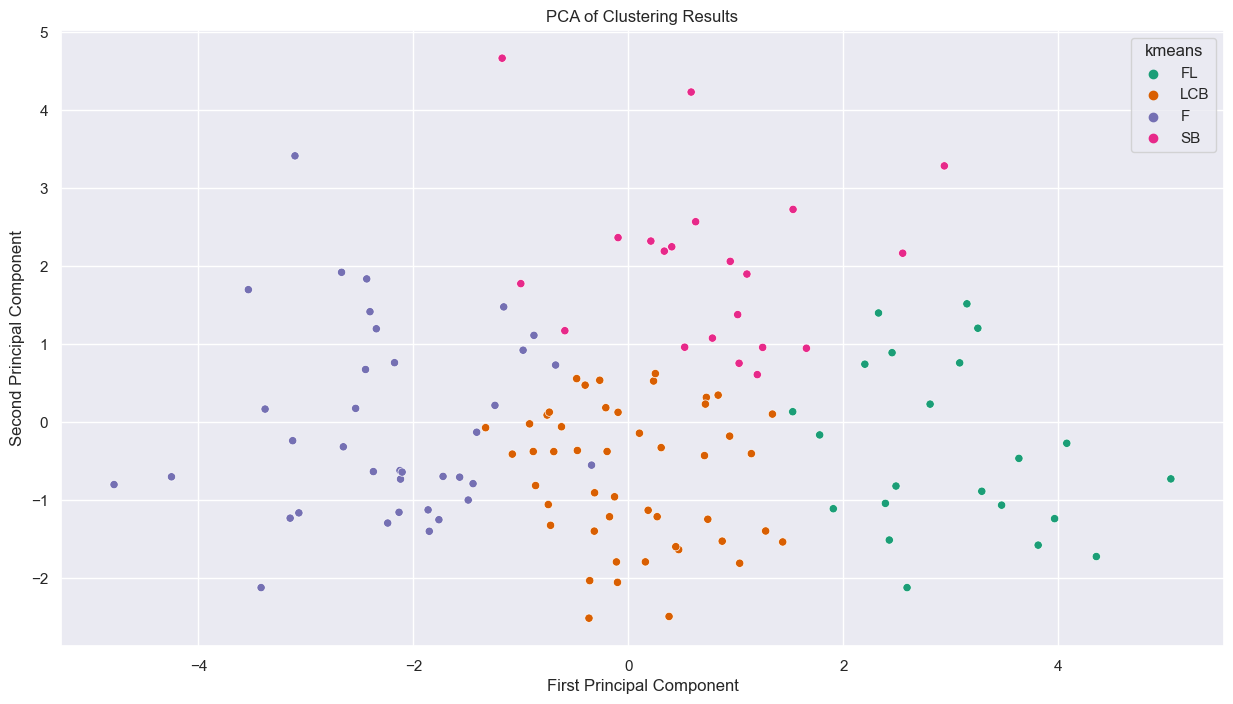

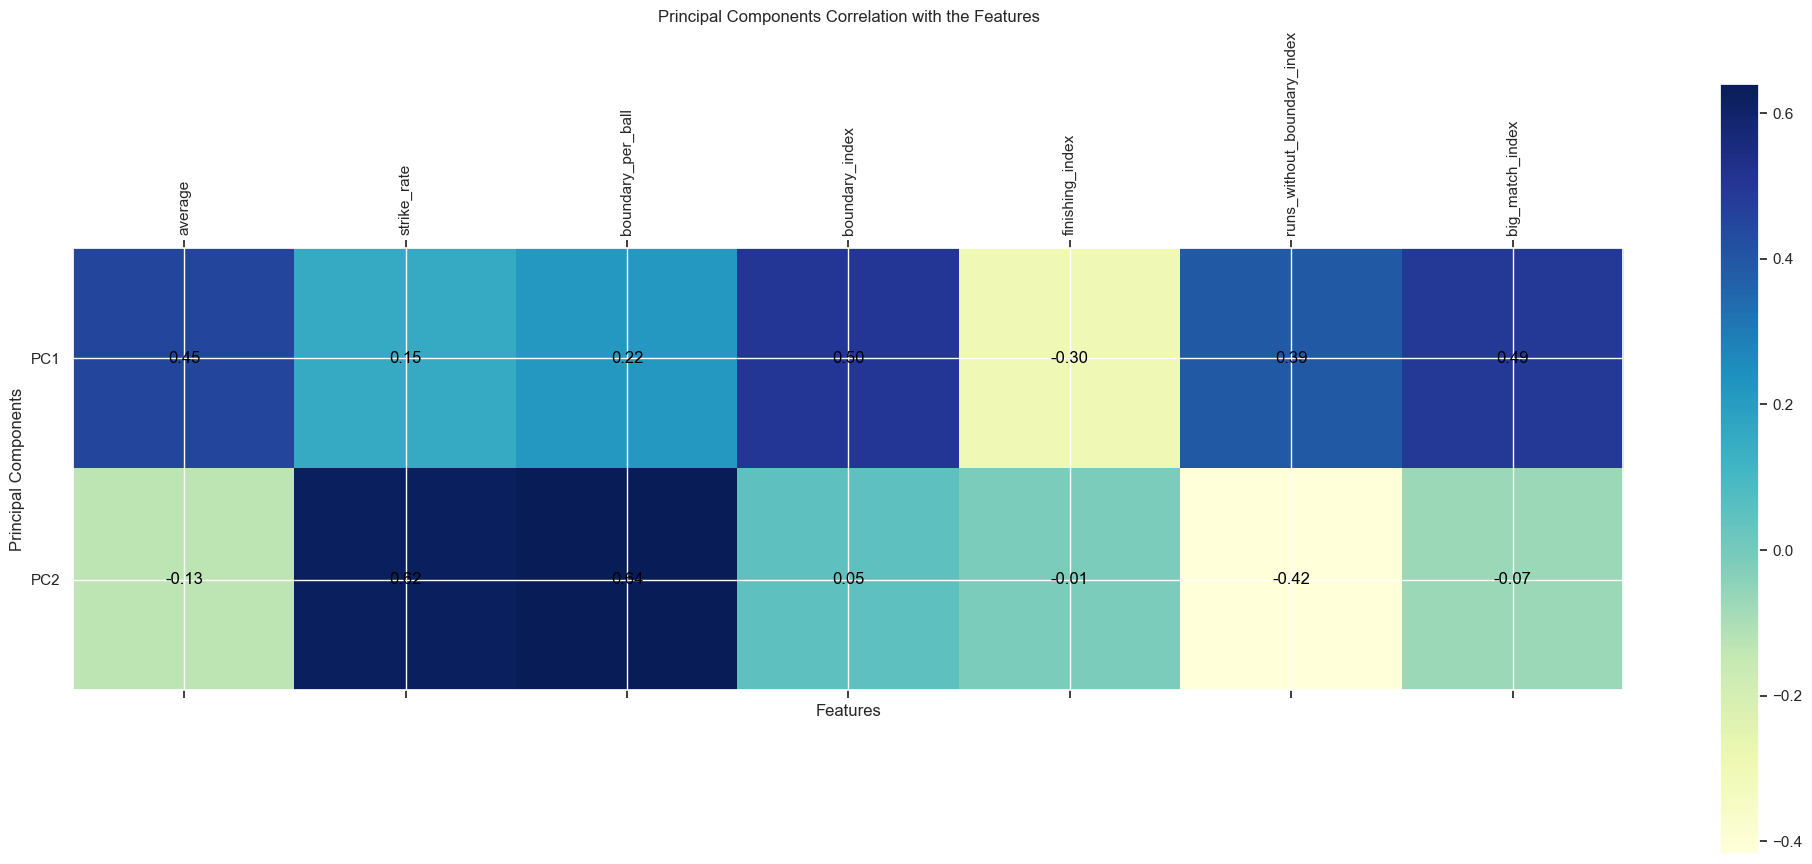

In [105]:
pca = PCA(n_components=2)
pca.fit(batter_for_clustering_scaled)
x_pca = pca.transform(batter_for_clustering_scaled)

# Print shapes of the original and PCA-transformed data
print(batter_for_clustering_scaled.shape)
print(x_pca.shape)

# Scatter plot of the first two principal components
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=results['kmeans'].map({0: 'FL', 1: 'LCB', 2: 'F', 3: 'SB'}), palette='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Clustering Results')
plt.show()

# Principal Components correlation with the features
df = pd.DataFrame(pca.components_, columns=columns)

fig, ax = plt.subplots(figsize=(25, 10))
cax = ax.matshow(df, cmap='YlGnBu')
fig.colorbar(cax)

# Set up axes
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(df.shape[0]))
ax.set_xticklabels(columns, rotation=90)
ax.set_yticklabels(['PC1', 'PC2'])

# Annotate each cell with the numeric value
for (i, j), val in np.ndenumerate(df.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Principal Components Correlation with the Features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# Feature selection with VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selected_features = selector.fit_transform(batter_for_clustering_scaled)

# Get boolean mask of selected features
support = selector.get_support()

In [106]:
pca.explained_variance_

array([3.85332446, 1.94872924])

In [107]:
pca.explained_variance_ratio_


array([0.54617434, 0.27621497])

In [108]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': 0.449,
 'strike_rate': 0.149,
 'boundary_per_ball': 0.217,
 'boundary_index': 0.498,
 'finishing_index': -0.301,
 'runs_without_boundary_index': 0.39,
 'big_match_index': 0.488}

In [109]:
final_index['pca_score'] = 0
for i in columns:
  final_index['pca_score'] = np.round(final_index['pca_score'] + (final_index[i] * dict_pca.get(i)),3)

In [110]:
final_index.sort_values('pca_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score','rbml_score'],axis=1)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,pca_score
87,DP Conway,CSK,2.800,0.484,0.602,2.569,-0.364,2.335,2.632,0,5.044
77,B Sai Sudharsan,GT,2.576,0.327,-0.245,1.801,-0.508,3.337,1.736,0,4.351
113,HM Amla,KXIP,2.216,0.519,0.665,1.821,0.105,1.428,2.925,0,4.075
76,LMP Simmons,MI,1.610,-0.602,0.069,2.021,-0.968,1.387,3.025,0,3.962
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2.365,-0.011,-0.276,1.551,-0.120,2.378,2.199,0,3.808
3,DA Warner,DC/SRH,1.686,0.372,0.414,1.657,-0.508,1.560,2.340,0,3.630
38,RD Gaikwad,CSK,1.855,0.156,-0.025,1.519,-0.481,2.005,1.917,0,3.469
36,SE Marsh,KXIP,1.608,-0.149,0.195,1.751,-0.679,1.603,1.726,0,3.285
94,RM Patidar,RCB,0.892,1.786,0.979,1.181,-1.211,0.773,2.290,0,3.251
6,CH Gayle,KKR/KXIP/PBKS/RCB,1.577,1.053,1.574,2.133,-0.571,-0.169,1.585,0,3.148


In [112]:
train_index = final_index[['name','team','kmeans','rfc_score','xgb_score','voting_score','rbml_score','pca_score']]

In [113]:
train_index['kmeans_role'] = train_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [114]:
train_index.drop('kmeans',axis=1)[(train_index['kmeans_role']=='SB')].sort_values('rbml_score',ascending=False).head(10)

,name,team,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
97,TM Head,RCB/SRH,1.328,1.372,1.464,1.930,2.938,SB
35,AD Russell,DC/KKR,0.563,0.425,0.671,1.605,0.585,SB
58,SP Narine,KKR,-0.059,-0.171,0.023,1.341,-1.173,SB
55,YBK Jaiswal,RR,0.916,1.020,1.206,1.286,2.551,SB
28,V Sehwag,DC/KXIP,0.579,0.634,0.810,1.232,1.532,SB
85,LS Livingstone,PBKS/RR,0.380,0.333,0.436,0.989,0.627,SB
50,N Pooran,KXIP/LSG/PBKS/SRH,0.431,0.313,0.412,0.935,0.401,SB
103,C Green,MI/RCB,0.732,0.601,0.607,0.868,0.780,SB
98,ST Jayasuriya,MI,0.391,0.452,0.602,0.795,1.103,SB
64,Abhishek Sharma,DC/SRH,0.146,0.105,0.243,0.786,0.209,SB


In [115]:
train_index.drop('kmeans',axis=1)[(train_index['kmeans_role']=='LCB')].sort_values('rbml_score').head(10)


,name,team,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
106,MR Marsh,DC/DCH/PWI/RPS/SRH,-0.735,-0.717,-0.695,-0.723,-1.328,LCB
126,SW Billings,CSK/DC/KKR,-0.713,-0.653,-0.715,-0.676,-1.080,LCB
95,MS Bisla,KKR/KXIP/RCB,-0.640,-0.564,-0.510,-0.676,-0.864,LCB
65,SC Ganguly,KKR/PWI,-0.499,-0.394,-0.410,-0.534,-0.363,LCB
75,M Vohra,KXIP/LSG/RCB/RR,-0.516,-0.512,-0.424,-0.471,-0.736,LCB
26,PA Patel,CSK/DCH/Kochi/MI/RCB/SRH,-0.444,-0.412,-0.345,-0.463,-0.694,LCB
24,WP Saha,CSK/GT/KKR/KXIP/SRH,-0.378,-0.396,-0.396,-0.386,-0.886,LCB
89,HH Gibbs,DCH/MI,-0.305,-0.199,-0.271,-0.356,-0.103,LCB
69,R Parag,RR,-0.368,-0.408,-0.420,-0.350,-0.919,LCB
27,Yuvraj Singh,DC/KXIP/MI/PWI/RCB/SRH,-0.343,-0.349,-0.304,-0.340,-0.623,LCB


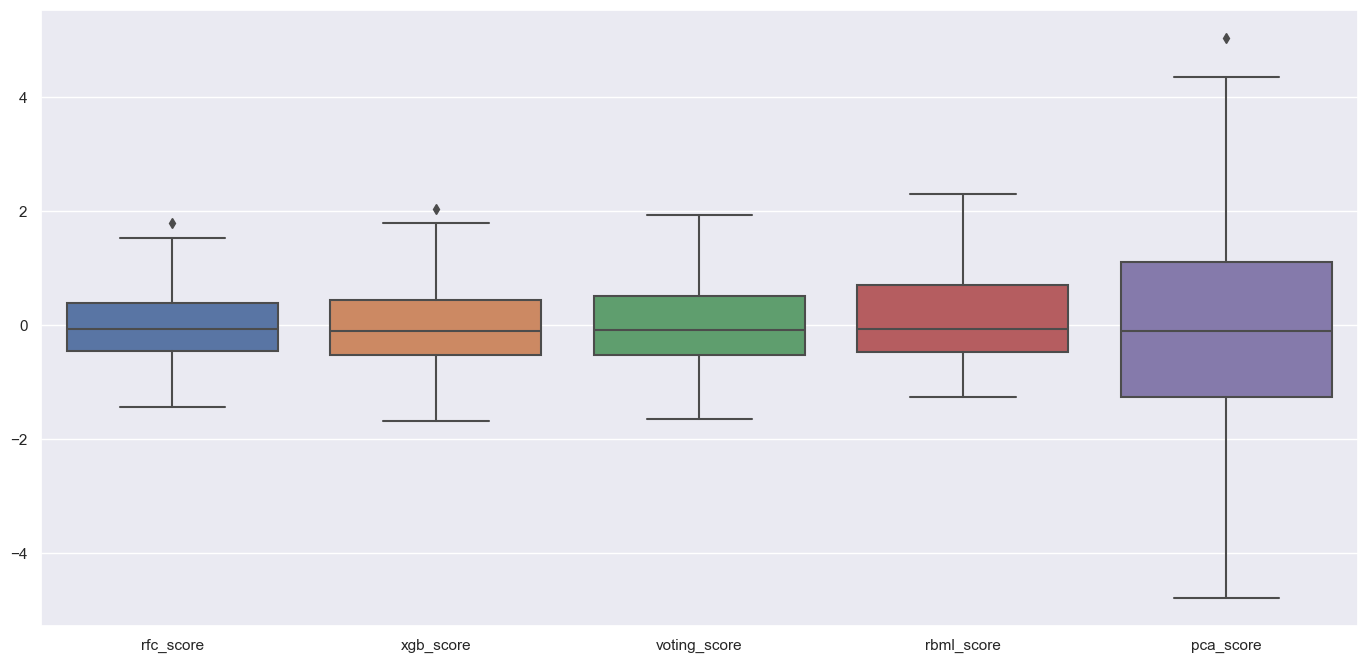

In [116]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=train_index[['rfc_score','xgb_score','voting_score','rbml_score','pca_score']])
plt.show()

In [117]:
from pathlib import Path

In [118]:
final_training_evaluation = batter.copy()

In [119]:
final_training_evaluation = pd.merge(final_training_evaluation,final_index[['name','team','kmeans','rbml_score','pca_score']],on=['name','team'],how='left')

In [120]:
final_training_evaluation

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,V Kohli,RCB,38.66,131.97,0.161,4.004,0.152,14.557,0.291,51.020,Best,0,1.176,2.426
1,S Dhawan,DC/DCH/MI/PBKS/SRH,35.25,127.14,0.173,4.163,0.131,12.602,0.249,44.817,Good,0,0.876,1.904
2,RG Sharma,DCH/MI,29.72,131.14,0.174,3.488,0.115,10.127,0.187,38.975,Average,1,0.126,0.707
3,DA Warner,DC/SRH,40.52,139.77,0.191,4.886,0.120,13.571,0.380,56.635,Best,0,1.677,3.630
4,SK Raina,CSK/GL,32.51,136.73,0.175,3.545,0.150,11.430,0.205,44.451,Good,1,0.365,1.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Gurkeerat Singh,KXIP/RCB,21.29,121.09,0.156,2.062,0.250,7.031,0.062,25.780,Poor,2,-0.642,-2.105
124,OA Shah,KKR/Kochi/RR,33.73,130.07,0.147,2.591,0.318,10.545,0.182,43.873,Good,1,0.031,-0.177
125,PC Valthaty,KXIP/RR,22.95,120.81,0.191,3.478,0.043,6.304,0.174,27.726,Poor,1,-0.308,-0.097
126,SW Billings,CSK/DC/KKR,19.34,129.63,0.155,2.222,0.037,8.259,0.111,25.070,Poor,1,-0.676,-1.080


In [121]:
final_training_evaluation['kmeans_role'] = final_training_evaluation['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [122]:
cols_final = final_training_evaluation.columns.tolist()
cols_final = ['name','team','average','strike_rate','boundary_per_ball','boundary_index','finishing_index','runs_without_boundary_index','big_match_index','prelim_metric','pre-rank','kmeans','kmeans_role', 'rbml_score','pca_score']

In [123]:
final_training_evaluation = final_training_evaluation[cols_final]

In [124]:
final_training_evaluation[(final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
97,TM Head,RCB/SRH,36.76,173.87,0.261,4.640,0.160,9.120,0.280,63.915,Good,3,SB,1.930,2.938
35,AD Russell,DC/KKR,29.22,174.92,0.267,3.610,0.190,5.238,0.105,51.112,Best,3,SB,1.605,0.585
58,SP Narine,KKR,17.04,165.83,0.282,2.373,0.182,2.691,0.082,28.257,Poor,3,SB,1.341,-1.173
55,YBK Jaiswal,RR,32.14,150.60,0.246,5.038,0.038,8.288,0.250,48.403,Good,3,SB,1.286,2.551
28,V Sehwag,DC/KXIP,27.55,155.44,0.251,4.231,0.048,7.269,0.192,42.824,Good,3,SB,1.232,1.532
85,LS Livingstone,PBKS/RR,28.45,162.45,0.228,3.385,0.154,7.154,0.154,46.217,Good,3,SB,0.989,0.627
50,N Pooran,KXIP/LSG/PBKS/SRH,32.16,162.29,0.219,3.274,0.247,7.658,0.123,52.192,Best,3,SB,0.935,0.401
103,C Green,MI/RCB,41.58,153.69,0.204,3.357,0.393,9.536,0.143,63.904,Good,3,SB,0.868,0.780
98,ST Jayasuriya,MI,27.42,144.36,0.231,4.100,0.067,6.600,0.200,39.584,Average,3,SB,0.795,1.103
64,Abhishek Sharma,DC/SRH,25.50,155.24,0.227,3.295,0.115,7.000,0.115,39.586,Average,3,SB,0.786,0.209


In [125]:
final_training_evaluation[(final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
97,TM Head,RCB/SRH,36.76,173.87,0.261,4.640,0.160,9.120,0.280,63.915,Good,3,SB,1.930,2.938
35,AD Russell,DC/KKR,29.22,174.92,0.267,3.610,0.190,5.238,0.105,51.112,Best,3,SB,1.605,0.585
58,SP Narine,KKR,17.04,165.83,0.282,2.373,0.182,2.691,0.082,28.257,Poor,3,SB,1.341,-1.173
55,YBK Jaiswal,RR,32.14,150.60,0.246,5.038,0.038,8.288,0.250,48.403,Good,3,SB,1.286,2.551
28,V Sehwag,DC/KXIP,27.55,155.44,0.251,4.231,0.048,7.269,0.192,42.824,Good,3,SB,1.232,1.532
85,LS Livingstone,PBKS/RR,28.45,162.45,0.228,3.385,0.154,7.154,0.154,46.217,Good,3,SB,0.989,0.627
50,N Pooran,KXIP/LSG/PBKS/SRH,32.16,162.29,0.219,3.274,0.247,7.658,0.123,52.192,Best,3,SB,0.935,0.401
103,C Green,MI/RCB,41.58,153.69,0.204,3.357,0.393,9.536,0.143,63.904,Good,3,SB,0.868,0.780
98,ST Jayasuriya,MI,27.42,144.36,0.231,4.100,0.067,6.600,0.200,39.584,Average,3,SB,0.795,1.103
64,Abhishek Sharma,DC/SRH,25.50,155.24,0.227,3.295,0.115,7.000,0.115,39.586,Average,3,SB,0.786,0.209


In [126]:
final_training_evaluation[(final_training_evaluation.kmeans == 2)].sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
5,MS Dhoni,CSK/RPS,39.12,137.53,0.161,2.686,0.415,9.952,0.105,53.802,Best,2,F,0.257,-0.345
21,YK Pathan,KKR/RR/SRH,29.12,142.97,0.187,2.727,0.286,7.844,0.097,41.633,Average,2,F,-0.079,-0.677
68,SO Hetmyer,DC/RCB/RR,31.07,153.07,0.195,2.394,0.394,6.773,0.061,47.559,Good,2,F,-0.090,-1.161
19,KA Pollard,MI,28.67,147.32,0.190,2.579,0.304,7.029,0.094,42.237,Good,2,F,-0.122,-0.878
33,HH Pandya,GT/MI,28.69,145.61,0.187,2.539,0.312,7.445,0.078,41.776,Average,2,F,-0.160,-0.980
79,MC Henriques,DC/KKR/PBKS/RCB/SRH,27.77,126.90,0.146,2.130,0.333,8.963,0.093,35.240,Average,2,F,-0.297,-1.492
90,SM Curran,CSK/KXIP/PBKS,25.22,136.47,0.172,2.312,0.271,7.604,0.104,34.418,Average,2,F,-0.318,-1.242
117,CJ Anderson,DC/MI/RCB,24.45,127.18,0.168,2.448,0.241,6.621,0.103,31.096,Poor,2,F,-0.365,-1.412
73,V Shankar,CSK/DC/GT/SRH,25.34,129.80,0.146,2.083,0.267,8.750,0.100,32.891,Poor,2,F,-0.430,-1.446
83,JA Morkel,CSK/DC/RCB/RPS,24.35,141.98,0.169,1.706,0.412,5.882,0.044,34.572,Average,2,F,-0.503,-2.446


In [127]:
final_training_evaluation[(final_training_evaluation.kmeans == 1)].sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
67,VR Iyer,KKR,31.57,137.12,0.188,3.714,0.143,9.714,0.265,43.289,Good,1,LCB,0.426,1.338
39,SR Tendulkar,MI,34.83,119.81,0.166,4.154,0.141,12.564,0.192,41.730,Average,1,LCB,0.366,1.434
4,SK Raina,CSK/GL,32.51,136.73,0.175,3.545,0.150,11.430,0.205,44.451,Good,1,LCB,0.365,1.143
42,KS Williamson,GT/SRH,35.46,125.61,0.147,3.234,0.221,13.039,0.234,44.541,Good,1,LCB,0.295,1.033
12,SV Samson,DC/RR,30.68,138.96,0.175,3.423,0.117,10.890,0.190,42.633,Good,1,LCB,0.259,0.941
14,G Gambhir,DC/KKR,31.00,123.88,0.162,3.625,0.105,12.467,0.237,38.403,Average,1,LCB,0.242,1.277
45,JP Duminy,DC/DCH/MI,39.78,124.02,0.125,2.662,0.338,13.649,0.182,49.335,Good,1,LCB,0.175,0.376
30,Ishan Kishan,GL/MI,28.43,135.86,0.192,3.778,0.061,9.192,0.162,38.625,Average,1,LCB,0.166,0.834
59,S Dube,CSK/RCB/RR,30.04,146.67,0.183,3.066,0.180,9.049,0.148,44.060,Good,1,LCB,0.166,0.250
34,SPD Smith,DC/PWI/RPS/RR,34.51,128.09,0.147,3.065,0.226,13.172,0.140,44.204,Good,1,LCB,0.150,0.465


In [128]:
final_training_evaluation.sort_values('pca_score',ascending = False).drop(['rbml_score','kmeans'],axis=1).head(15)


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans_role,pca_score
87,DP Conway,CSK,48.63,141.28,0.197,5.864,0.136,15.818,0.409,68.704,Best,FL,5.044
77,B Sai Sudharsan,GT,47.00,139.16,0.170,5.040,0.120,18.720,0.320,65.405,Best,FL,4.351
113,HM Amla,KXIP,44.38,141.76,0.199,5.062,0.188,13.188,0.438,62.913,Good,FL,4.075
76,LMP Simmons,MI,39.96,126.64,0.180,5.276,0.069,13.069,0.448,50.605,Best,FL,3.962
9,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,45.46,134.60,0.169,4.772,0.163,15.943,0.366,61.189,Best,FL,3.808
3,DA Warner,DC/SRH,40.52,139.77,0.191,4.886,0.120,13.571,0.380,56.635,Best,FL,3.630
38,RD Gaikwad,CSK,41.75,136.86,0.177,4.738,0.123,14.862,0.338,57.139,Best,FL,3.469
36,SE Marsh,KXIP,39.95,132.74,0.184,4.986,0.101,13.696,0.319,53.030,Best,FL,3.285
94,RM Patidar,RCB,34.73,158.84,0.209,4.375,0.042,11.292,0.375,55.165,Good,FL,3.251
6,CH Gayle,KKR/KXIP/PBKS/RCB,39.72,148.96,0.228,5.397,0.113,8.560,0.305,59.167,Best,FL,3.148


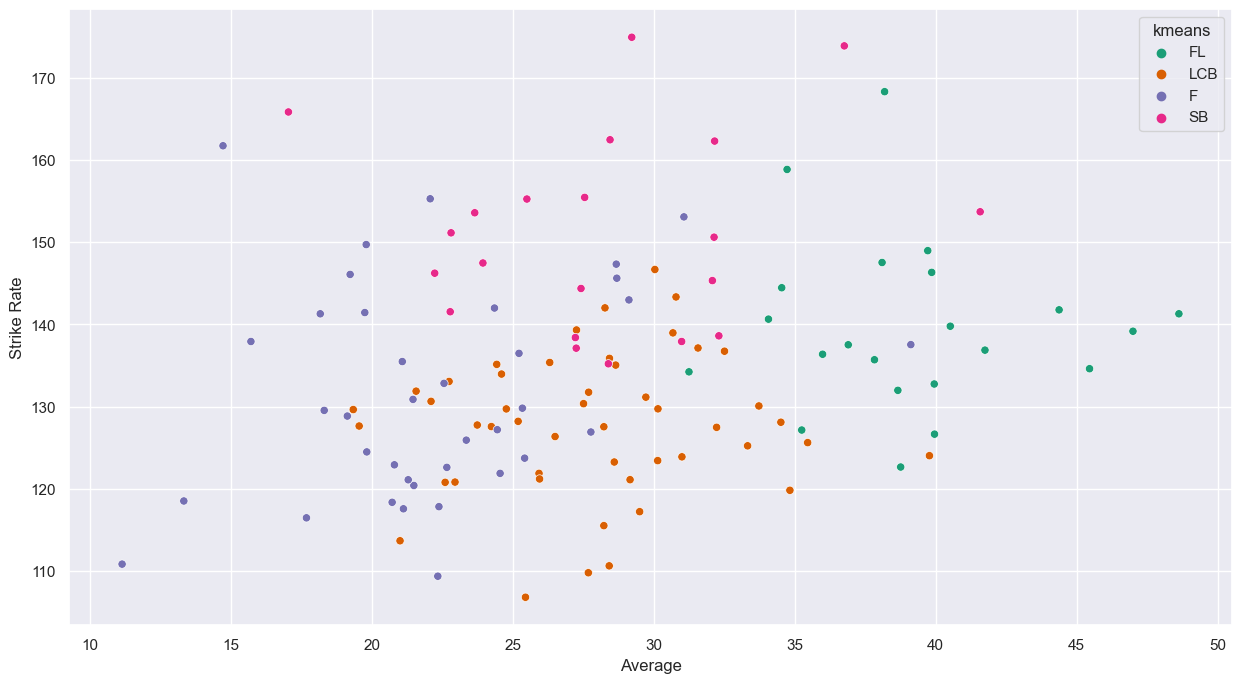

In [129]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x='average', y='strike_rate',data=final_training_evaluation,hue=results['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'}),palette='Dark2')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.show()

In [130]:
filepath_batter_evaluation_train = Path('final_training_evaluation_batter.csv') 
final_training_evaluation.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_train,index=False)

In [131]:
batter_test=pd.read_csv('batter_test.csv')

In [132]:
batter_test['pre-rank'].value_counts()

pre-rank
Poor       8
Average    7
Good       4
Best       3
Name: count, dtype: int64

In [133]:
batter_test_for_clustering = batter_test.copy().drop(['name','team','prelim_metric','pre-rank'],axis=1)
batter_test_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,36.09,139.23,0.162,2.750,0.347,10.419,0.121
1,30.65,118.89,0.150,2.716,0.299,9.806,0.164
2,28.73,120.09,0.129,2.176,0.297,10.135,0.108
3,26.81,114.49,0.163,3.280,0.140,8.980,0.180
4,24.38,134.03,0.148,2.000,0.257,8.743,0.114
...,...,...,...,...,...,...,...
17,19.14,121.81,0.120,1.432,0.243,7.405,0.027
18,22.60,129.56,0.154,1.646,0.389,6.053,0.044
19,37.07,134.72,0.176,3.639,0.250,11.028,0.167
20,26.97,122.97,0.140,2.459,0.197,9.869,0.082


In [134]:
scaler = StandardScaler()
batter_test_for_clustering_scaled= scaler.fit_transform(batter_test_for_clustering)

In [135]:
batter_test_for_clustering_scaled = pd.DataFrame(batter_test_for_clustering_scaled,columns = columns)
batter_test_for_clustering_scaled

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,1.357212,0.337908,-0.153533,0.015733,0.950052,0.762452,0.024967
1,0.358987,-0.855142,-0.470194,-0.021986,0.477932,0.444995,0.561746
2,0.006673,-0.784756,-1.024352,-0.621043,0.458260,0.615376,-0.137316
3,-0.345642,-1.113226,-0.127144,0.603696,-1.085965,0.017231,0.761479
4,-0.791540,0.032900,-0.522971,-0.816291,0.064827,-0.105505,-0.062416
...,...,...,...,...,...,...,...
17,-1.753065,-0.683869,-1.261848,-1.446410,-0.072875,-0.798421,-1.148459
18,-1.118165,-0.229289,-0.364641,-1.209006,1.363157,-1.498586,-0.936244
19,1.537039,0.073373,0.215906,1.001958,-0.004024,1.077837,0.599196
20,-0.316282,-0.615828,-0.734079,-0.307092,-0.525323,0.477621,-0.461880


In [136]:
batter_test_scaled = batter_test_for_clustering_scaled.copy()
batter_test_scaled['name'] = batter_test['name']
batter_test_scaled['team'] = batter_test['team']

cols = batter_test_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


batter_test_scaled = batter_test_scaled [cols]
batter_test_scaled

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,DA Miller,GT/KXIP/RR,1.357212,0.337908,-0.153533,0.015733,0.950052,0.762452,0.024967
1,S Badrinath,CSK,0.358987,-0.855142,-0.470194,-0.021986,0.477932,0.444995,0.561746
2,SS Tiwary,DC/MI/RCB/RPS,0.006673,-0.784756,-1.024352,-0.621043,0.458260,0.615376,-0.137316
3,TM Dilshan,DC/RCB,-0.345642,-1.113226,-0.127144,0.603696,-1.085965,0.017231,0.761479
4,A Badoni,LSG,-0.791540,0.032900,-0.522971,-0.816291,0.064827,-0.105505,-0.062416
...,...,...,...,...,...,...,...,...,...
17,Shahbaz Ahmed,RCB/SRH,-1.753065,-0.683869,-1.261848,-1.446410,-0.072875,-0.798421,-1.148459
18,DJ Bravo,CSK/GL/MI,-1.118165,-0.229289,-0.364641,-1.209006,1.363157,-1.498586,-0.936244
19,KP Pietersen,DC/RCB/RPS,1.537039,0.073373,0.215906,1.001958,-0.004024,1.077837,0.599196
20,DJ Hussey,CSK/KKR/KXIP,-0.316282,-0.615828,-0.734079,-0.307092,-0.525323,0.477621,-0.461880


In [137]:
ypred_test = kmodel.predict(batter_test_for_clustering_scaled)
results_test = batter_test_scaled
results_test['kmeans'] = ypred_test

In [138]:
results_mid = results_test.copy()
final_test_index = results_test.copy()
middle_ovr = pd.DataFrame()

In [139]:
results_0 = results_mid[results_mid['kmeans'] == 0]
results_1 = results_mid[results_mid['kmeans'] == 1]
results_2 = results_mid[results_mid['kmeans'] == 2]
results_3 = results_mid[results_mid['kmeans'] == 3]

In [140]:
results_0['rbml_score'] = 0
for i in columns:
  results_0['rbml_score'] = np.round(results_0['rbml_score'] + (results_0[i] * dict_0.get(i)),3)

In [141]:
middle_ovr = results_0.copy()

In [142]:
results_1['rbml_score'] = 0
for i in columns:
  results_1['rbml_score'] = np.round(results_1['rbml_score'] + (results_1[i] * dict_1.get(i)),3)

In [144]:
middle_ovr = pd.concat([middle_ovr, results_1], ignore_index=True)

In [145]:
results_2['rbml_score'] = 0
for i in columns:
  results_2['rbml_score'] = np.round(results_2['rbml_score'] + (results_2[i] * dict_2.get(i)),3)

In [146]:
middle_ovr = pd.concat([middle_ovr, results_2], ignore_index=True)

In [147]:
results_3['rbml_score'] = 0
for i in columns:
  results_3['rbml_score'] = np.round(results_3['rbml_score'] + (results_3[i] * dict_3.get(i)),3)

In [148]:
middle_ovr = pd.concat([middle_ovr, results_3], ignore_index=True)

In [149]:
middle_ovr

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
0,RR Pant,DC,1.214084,0.906866,0.954782,1.503391,-0.938428,0.903314,0.786445,0,0.956
1,AB de Villiers,DC/RCB,2.019637,1.068168,0.717286,1.298159,-0.151561,1.471422,1.897455,0,1.536
2,KP Pietersen,DC/RCB/RPS,1.537039,0.073373,0.215906,1.001958,-0.004024,1.077837,0.599196,0,0.858
3,A Symonds,DCH/MI,1.353542,-0.211693,-0.391029,0.508291,-0.004024,1.581211,0.936244,0,0.885
4,DA Miller,GT/KXIP/RR,1.357212,0.337908,-0.153533,0.015733,0.950052,0.762452,0.024967,1,0.383
...,...,...,...,...,...,...,...,...,...,...,...
17,Shahbaz Ahmed,RCB/SRH,-1.753065,-0.683869,-1.261848,-1.446410,-0.072875,-0.798421,-1.148459,2,-1.110
18,DJ Bravo,CSK/GL/MI,-1.118165,-0.229289,-0.364641,-1.209006,1.363157,-1.498586,-0.936244,2,-0.666
19,PD Salt,DC/KKR,1.039762,2.467099,3.224190,2.670444,-1.528577,-0.860048,2.084704,3,2.089
20,GJ Maxwell,DC/KXIP/MI/RCB,-0.725481,1.364378,1.429775,0.336339,-1.164652,-1.088430,0.262148,3,0.669


In [151]:
final_test_index = pd.merge(final_test_index,middle_ovr[['name','team','rbml_score']],on=['name','team'],how='left')


In [152]:
final_test_index

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
0,DA Miller,GT/KXIP/RR,1.357212,0.337908,-0.153533,0.015733,0.950052,0.762452,0.024967,1,0.383
1,S Badrinath,CSK,0.358987,-0.855142,-0.470194,-0.021986,0.477932,0.444995,0.561746,1,0.040
2,SS Tiwary,DC/MI/RCB/RPS,0.006673,-0.784756,-1.024352,-0.621043,0.458260,0.615376,-0.137316,1,-0.273
3,TM Dilshan,DC/RCB,-0.345642,-1.113226,-0.127144,0.603696,-1.085965,0.017231,0.761479,1,-0.044
4,A Badoni,LSG,-0.791540,0.032900,-0.522971,-0.816291,0.064827,-0.105505,-0.062416,1,-0.367
...,...,...,...,...,...,...,...,...,...,...,...
17,Shahbaz Ahmed,RCB/SRH,-1.753065,-0.683869,-1.261848,-1.446410,-0.072875,-0.798421,-1.148459,2,-1.110
18,DJ Bravo,CSK/GL/MI,-1.118165,-0.229289,-0.364641,-1.209006,1.363157,-1.498586,-0.936244,2,-0.666
19,KP Pietersen,DC/RCB/RPS,1.537039,0.073373,0.215906,1.001958,-0.004024,1.077837,0.599196,0,0.858
20,DJ Hussey,CSK/KKR/KXIP,-0.316282,-0.615828,-0.734079,-0.307092,-0.525323,0.477621,-0.461880,1,-0.318


In [153]:
final_test_index['pca_score'] = 0
for i in columns:
  final_test_index['pca_score'] = np.round(final_test_index['pca_score'] + (final_test_index[i] * dict_pca.get(i)),3)

In [154]:
final_test_index

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score,pca_score
0,DA Miller,GT/KXIP/RR,1.357212,0.337908,-0.153533,0.015733,0.950052,0.762452,0.024967,1,0.383,0.657
1,S Badrinath,CSK,0.358987,-0.855142,-0.470194,-0.021986,0.477932,0.444995,0.561746,1,0.040,0.225
2,SS Tiwary,DC/MI/RCB/RPS,0.006673,-0.784756,-1.024352,-0.621043,0.458260,0.615376,-0.137316,1,-0.273,-0.610
3,TM Dilshan,DC/RCB,-0.345642,-1.113226,-0.127144,0.603696,-1.085965,0.017231,0.761479,1,-0.044,0.658
4,A Badoni,LSG,-0.791540,0.032900,-0.522971,-0.816291,0.064827,-0.105505,-0.062416,1,-0.367,-0.961
...,...,...,...,...,...,...,...,...,...,...,...,...
17,Shahbaz Ahmed,RCB/SRH,-1.753065,-0.683869,-1.261848,-1.446410,-0.072875,-0.798421,-1.148459,2,-1.110,-2.732
18,DJ Bravo,CSK/GL/MI,-1.118165,-0.229289,-0.364641,-1.209006,1.363157,-1.498586,-0.936244,2,-0.666,-2.668
19,KP Pietersen,DC/RCB/RPS,1.537039,0.073373,0.215906,1.001958,-0.004024,1.077837,0.599196,0,0.858,1.960
20,DJ Hussey,CSK/KKR/KXIP,-0.316282,-0.615828,-0.734079,-0.307092,-0.525323,0.477621,-0.461880,1,-0.318,-0.427


In [155]:
final_evaluation_index = batter_test.copy()

In [156]:
final_evaluation_index = pd.merge(final_evaluation_index,final_test_index[['name','team','kmeans','rbml_score','pca_score']],on=['name','team'],how='left')


In [157]:
final_evaluation_index

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,DA Miller,GT/KXIP/RR,36.09,139.23,0.162,2.750,0.347,10.419,0.121,50.248,Best,1,0.383,0.657
1,S Badrinath,CSK,30.65,118.89,0.150,2.716,0.299,9.806,0.164,36.440,Average,1,0.040,0.225
2,SS Tiwary,DC/MI/RCB/RPS,28.73,120.09,0.129,2.176,0.297,10.135,0.108,34.502,Average,1,-0.273,-0.610
3,TM Dilshan,DC/RCB,26.81,114.49,0.163,3.280,0.140,8.980,0.180,30.695,Poor,1,-0.044,0.658
4,A Badoni,LSG,24.38,134.03,0.148,2.000,0.257,8.743,0.114,32.677,Poor,1,-0.367,-0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Shahbaz Ahmed,RCB/SRH,19.14,121.81,0.120,1.432,0.243,7.405,0.027,23.314,Poor,2,-1.110,-2.732
18,DJ Bravo,CSK/GL/MI,22.60,129.56,0.154,1.646,0.389,6.053,0.044,29.281,Poor,2,-0.666,-2.668
19,KP Pietersen,DC/RCB/RPS,37.07,134.72,0.176,3.639,0.250,11.028,0.167,49.941,Good,0,0.858,1.960
20,DJ Hussey,CSK/KKR/KXIP,26.97,122.97,0.140,2.459,0.197,9.869,0.082,33.165,Average,1,-0.318,-0.427


In [158]:
final_evaluation_index['kmeans_role'] = final_evaluation_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})
final_evaluation_index = final_evaluation_index[cols_final]

In [159]:
final_evaluation_index[final_evaluation_index['pre-rank'] == 'Best']

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
0,DA Miller,GT/KXIP/RR,36.09,139.23,0.162,2.750,0.347,10.419,0.121,50.248,Best,1,LCB,0.383,0.657
10,RR Pant,DC,35.31,148.93,0.204,4.091,0.155,10.691,0.182,52.587,Best,0,FL,0.956,2.654
14,AB de Villiers,DC/RCB,39.70,151.68,0.195,3.906,0.235,11.788,0.271,60.217,Best,0,FL,1.536,3.414


In [160]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
6,PD Salt,DC/KKR,34.36,175.53,0.290,5.143,0.095,7.286,0.286,60.312,Good,3,SB,2.089,4.007
14,AB de Villiers,DC/RCB,39.70,151.68,0.195,3.906,0.235,11.788,0.271,60.217,Best,0,FL,1.536,3.414
10,RR Pant,DC,35.31,148.93,0.204,4.091,0.155,10.691,0.182,52.587,Best,0,FL,0.956,2.654
21,A Symonds,DCH/MI,36.07,129.86,0.153,3.194,0.250,12.000,0.194,46.841,Good,0,FL,0.885,1.819
19,KP Pietersen,DC/RCB/RPS,37.07,134.72,0.176,3.639,0.250,11.028,0.167,49.941,Good,0,FL,0.858,1.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,RA Jadeja,CSK/GL/Kochi/RR,27.39,129.78,0.141,1.750,0.413,7.918,0.016,35.547,Average,2,F,-0.534,-2.154
13,SN Khan,DC/KXIP/PBKS/RCB,22.50,130.58,0.172,2.081,0.297,6.730,0.027,29.380,Poor,2,F,-0.645,-2.019
18,DJ Bravo,CSK/GL/MI,22.60,129.56,0.154,1.646,0.389,6.053,0.044,29.281,Poor,2,F,-0.666,-2.668
8,KM Jadhav,CSK/DC/Kochi/RCB/SRH,22.37,123.13,0.145,1.753,0.333,6.914,0.049,27.544,Poor,2,F,-0.694,-2.367


In [161]:
final_evaluation_index['kmeans_role'].value_counts()

kmeans_role
LCB    9
F      6
FL     4
SB     3
Name: count, dtype: int64

In [162]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
6,PD Salt,DC/KKR,34.36,175.53,0.290,5.143,0.095,7.286,0.286,60.312,Good,3,SB,2.089,4.007
14,AB de Villiers,DC/RCB,39.70,151.68,0.195,3.906,0.235,11.788,0.271,60.217,Best,0,FL,1.536,3.414
10,RR Pant,DC,35.31,148.93,0.204,4.091,0.155,10.691,0.182,52.587,Best,0,FL,0.956,2.654
21,A Symonds,DCH/MI,36.07,129.86,0.153,3.194,0.250,12.000,0.194,46.841,Good,0,FL,0.885,1.819
19,KP Pietersen,DC/RCB/RPS,37.07,134.72,0.176,3.639,0.250,11.028,0.167,49.941,Good,0,FL,0.858,1.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,RA Jadeja,CSK/GL/Kochi/RR,27.39,129.78,0.141,1.750,0.413,7.918,0.016,35.547,Average,2,F,-0.534,-2.154
13,SN Khan,DC/KXIP/PBKS/RCB,22.50,130.58,0.172,2.081,0.297,6.730,0.027,29.380,Poor,2,F,-0.645,-2.019
18,DJ Bravo,CSK/GL/MI,22.60,129.56,0.154,1.646,0.389,6.053,0.044,29.281,Poor,2,F,-0.666,-2.668
8,KM Jadhav,CSK/DC/Kochi/RCB/SRH,22.37,123.13,0.145,1.753,0.333,6.914,0.049,27.544,Poor,2,F,-0.694,-2.367


In [163]:
final_evaluation_index[(final_evaluation_index['kmeans_role']=='LCB') & (final_evaluation_index['pre-rank']!='Poor')]


,name,team,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
0,DA Miller,GT/KXIP/RR,36.09,139.23,0.162,2.750,0.347,10.419,0.121,50.248,Best,1,LCB,0.383,0.657
1,S Badrinath,CSK,30.65,118.89,0.150,2.716,0.299,9.806,0.164,36.440,Average,1,LCB,0.040,0.225
2,SS Tiwary,DC/MI/RCB/RPS,28.73,120.09,0.129,2.176,0.297,10.135,0.108,34.502,Average,1,LCB,-0.273,-0.610
15,MK Tiwary,DC/KKR/KXIP/RPS,28.72,116.97,0.135,2.306,0.306,9.776,0.082,33.594,Average,1,LCB,-0.310,-0.790
20,DJ Hussey,CSK/KKR/KXIP,26.97,122.97,0.140,2.459,0.197,9.869,0.082,33.165,Average,1,LCB,-0.318,-0.427


In [164]:
filepath_batter_evaluation_test = Path('final_test_evaluation_batter.csv') 
final_evaluation_index.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_test,index=False)